# THỰC HÀNH 3: BIẾN ĐỔI HÌNH HỌC
## 1. VIẾT CHƯƠNG TRÌNH BIẾN ĐỎI ẢNH

### 1.1. Chọn đối tượng trong ảnh


(1427, 2100, 3)


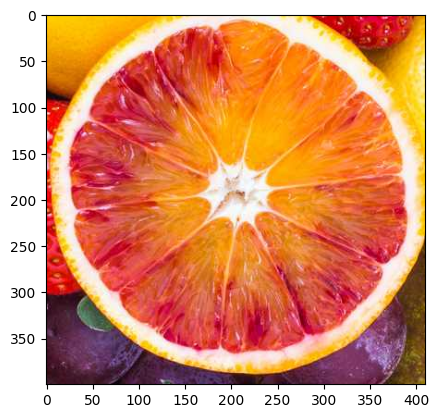

In [20]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
bmg = data [800:1200, 570:980]
print (data.shape)
iio.imsave('orange.jpg', bmg)
plt.imshow (bmg)
plt.show ()

### 1.2. Tịnh tiến đơn


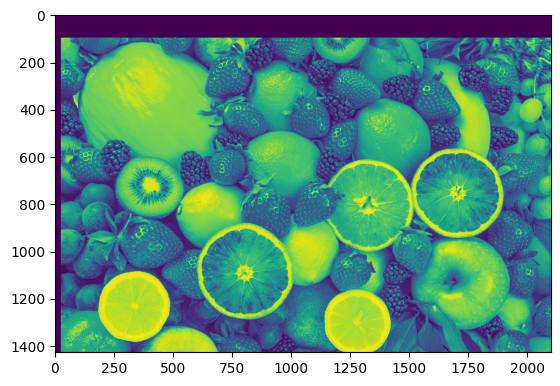

In [21]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg', mode ='L')
bdata = nd.shift (data, (100, 25), order=0)
plt.imshow (bdata)
plt.show ()


### 1.3. Thay đổi kích thước ảnh

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)
(714, 1890, 3)


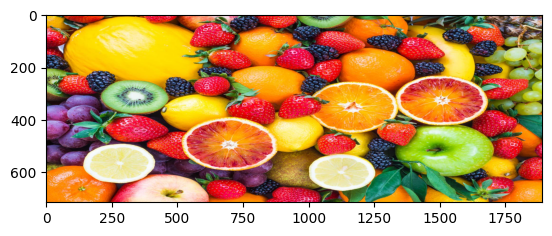

In [1]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
print (data.shape)
bdata = nd.zoom(data, 2)
print (bdata.shape)
data2 = nd.zoom (data, (2, 2, 1))
print (data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
print(data3.shape)
plt.imshow (data3)
plt.show ()


### 1.4. Xoay ảnh


(1427, 2100, 3)


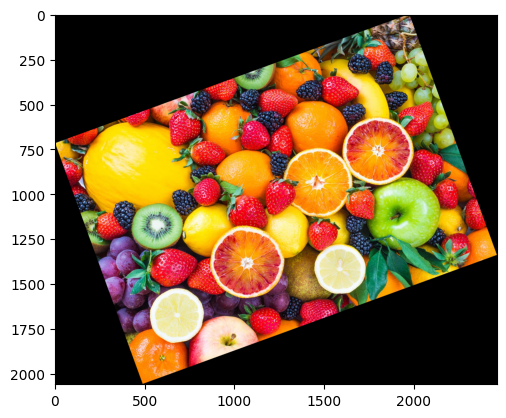

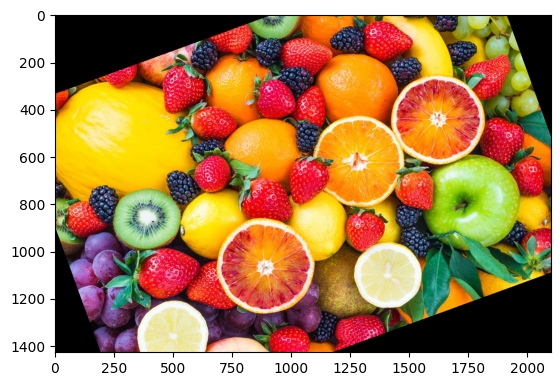

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
print (data.shape)
d1 = nd.rotate (data, 20)
plt.imshow (d1)
plt.show ()
d2 = nd.rotate (data, 20, reshape=False)
plt.imshow (d2)
plt.show ()


### 1.5. Dilation và Erosion

(309, 515)


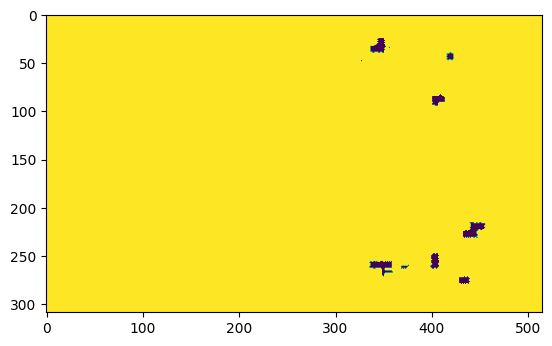

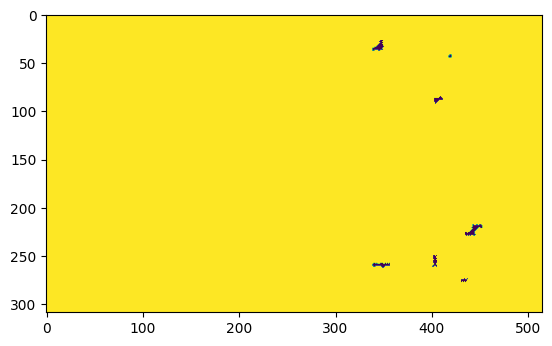

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('world_cup.jpg', mode = 'L')
print (data.shape)
dl = nd.binary_dilation (data)
plt.imshow (dl)
plt.show ()
d2 = nd.binary_dilation (data, iterations=3)
plt.imshow (d2)
plt.show ()

### 1.6. Coordinate Mapping

(309, 515)


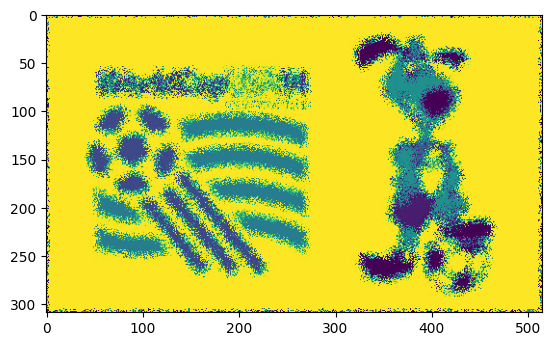

In [25]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('world_cup.jpg', mode='L')
print (data.shape)
V, H= data.shape
M = np.indices((V, H))
d = 5
q=2 * d * np.random.ranf (M.shape) - d
mp = (M + q).astype (int)
dl = nd.map_coordinates (data, mp)
plt.imshow (dl)
plt.show ()


### 1.7. Biến đổi chung (Generic Transformation)


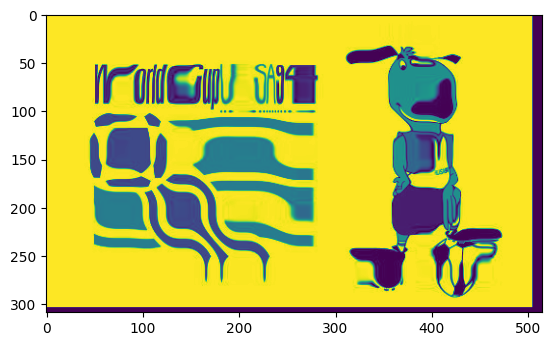

In [26]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
def GeoFun (outcoord):
    a = 10 * np.cos (outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos (outcoord[1]/10.0) + outcoord[1]
    return a, b
    
data = iio.imread('world_cup.jpg', mode = 'L')
d1 = nd.geometric_transform(data, GeoFun)
plt.imshow (d1)
plt.show ()

## 2. BÀI TẬP

### 1. Viết chương trình chọn quả kiwi từ ảnh colorful-ripe-tropical-fruits.jpg trong thư mục exercise. Tinh tiến quả kiwi sang phải 30 pixels.


(1414, 2119, 3)


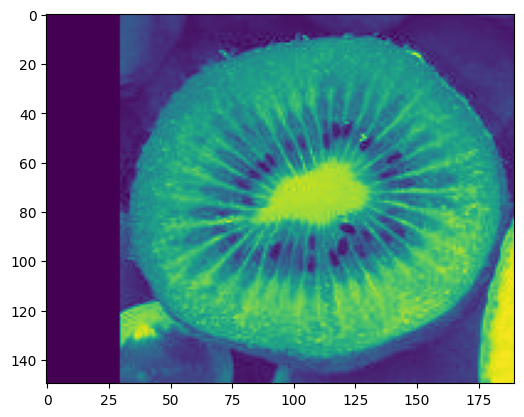

In [27]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
bmg = data [120:270, 130:320]
print (data.shape)
iio.imsave('kiwi.jpg', bmg)
data = iio.imread('kiwi.jpg', mode ='L')
bdata = nd.shift (data, (0, 30), order=0)
plt.imshow (bdata)
# plt.imshow(bmg)
plt.show ()

### 2. Viết chương trình chọn quả đu đủ và quả dưa hấu từ ảnh colorful-ripe-tropical-fruits.jpg trong thư mục exercise. Đổi màu hai đối tượng này.


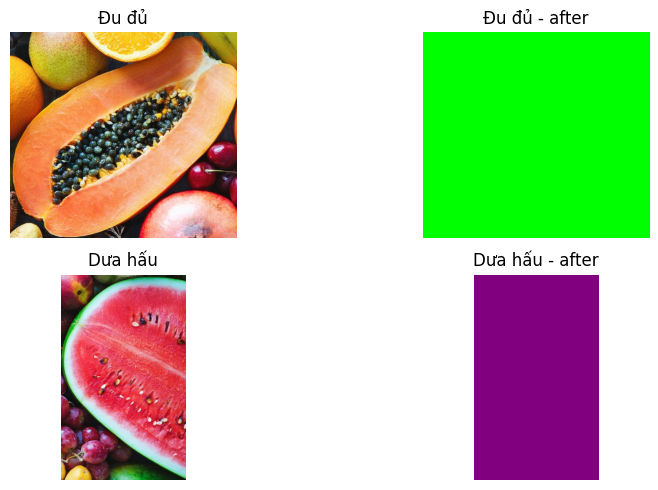

In [28]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd
# đọc ảnh gốc
data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
# cắt vùng chứa đu đủ và dưa hấu
bmg1 = data [320:810,120:660]
bmg2 = data [300:1100, 1635:2140]
# lưu ảnh
iio.imsave('dudu.jpg', bmg1)
iio.imsave('duahau.jpg', bmg2)
data = iio.imread('dudu.jpg')
data = iio.imread('duahau.jpg')

# Bước 3: Tạo bản sao ảnh để chỉnh màu
dudu =bmg1.copy()
duahau =bmg2.copy()

#Đổi màu đu đủ thành màu xanh (RGB: 0, 255, 0)
dudu[ : , : ] = [0, 255, 0]  # Xanh lá cây

#Đổi màu dưa hấu thành màu tím (RGB: 128, 0, 128)
duahau[ : , : ]= [128, 0, 128]  # Tím

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(bmg1)
plt.title('Đu đủ')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dudu)
plt.title('Đu đủ - after')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(bmg2)
plt.title('Dưa hấu')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(duahau)
plt.title('Dưa hấu - after')
plt.axis('off')

plt.tight_layout()
plt.show ()

### 3. Viết chương trình chọn ngọn núi và con thuyền từ ảnh quang_ninh.jpg trong thư mục exercise. Xoay 2 đối tượng này 1 góc 45 độ và lưu vào máy.


(605, 1021, 3)


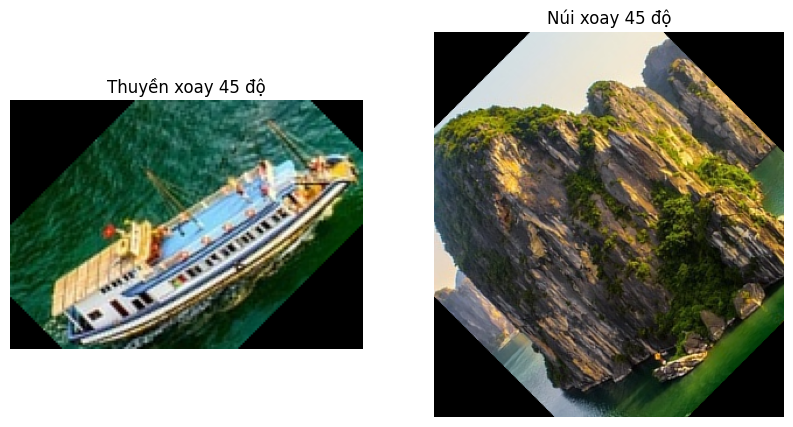

In [1]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('exercise/quang_ninh.jpg')
# cắt vùng chứa thuyền và núi
bmg1 = data [430:550,490:660]
bmg2 = data [20:350, 400:700]
print(data.shape)
# xoay ảnh chiếc thuyền và lưu
d1 = nd.rotate (bmg1, 45, reshape=False)
iio.imsave("thuyen_xoay45.jpg", d1)

# xoay ảnh núi và lưu
d2 = nd.rotate (bmg2, 45, reshape=False)
iio.imsave("nui_xoay45.jpg", d2)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(d1)
plt.title('Thuyền xoay 45 độ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(d2)
plt.title('Núi xoay 45 độ')
plt.axis('off')
plt.show()



### 4. Viết chương trình chọn ngôi chùa từ ảnh pagoda.jpg trong thư mục exercise. Tăng kích thước ngôi chùa lên 5 lần và lưu vào máy.


(350, 450, 3)


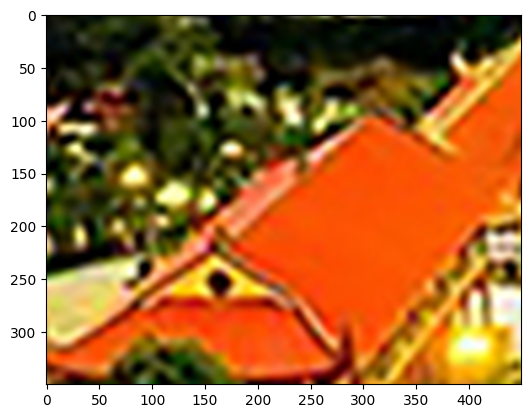

In [4]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('exercise/pagoda.jpg')
bmg = data [170:240, 50:140]
data_a = nd.zoom (bmg, (5, 5, 1))
print (data_a.shape)
iio.imsave("pagoda_zoom5.jpg", data_a)
plt.imshow (data_a)
plt.show ()




### 5. Viết chương trình tạo menu
- Tịnh tiến
- Xoay
- Phóng to
- Thu nhỏ
- Coordinate Map
Khi chọn phím T, X, P, H, C thì hỏi muốn thực hiện trên hình nào từ 3 hình trong thư mục
exercise. Người dùng chọn hình nào thì thực hiện phép biến đổi trên hình đó.

=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===
	T. Tịnh tiến 
	X. Xoay ảnh
	P. Phóng to ảnh
	H. Thu nhỏ ảnh
	C. Coordinate Mapping
	E. Thoát


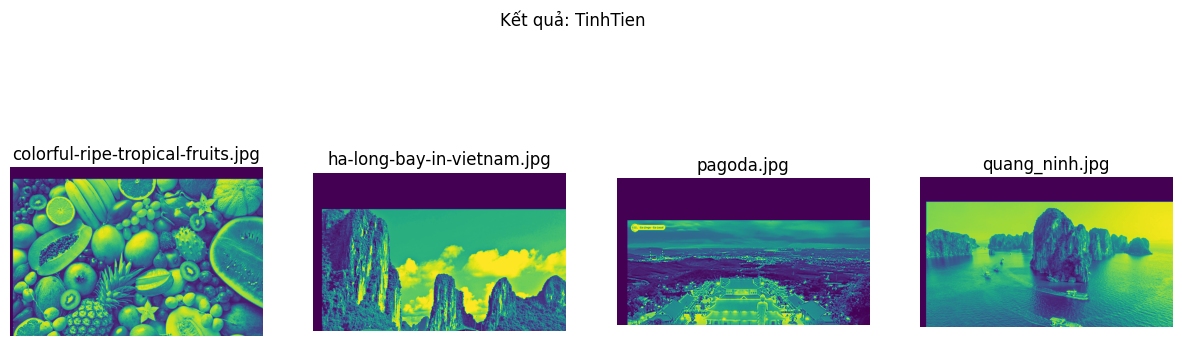

=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===
	T. Tịnh tiến 
	X. Xoay ảnh
	P. Phóng to ảnh
	H. Thu nhỏ ảnh
	C. Coordinate Mapping
	E. Thoát


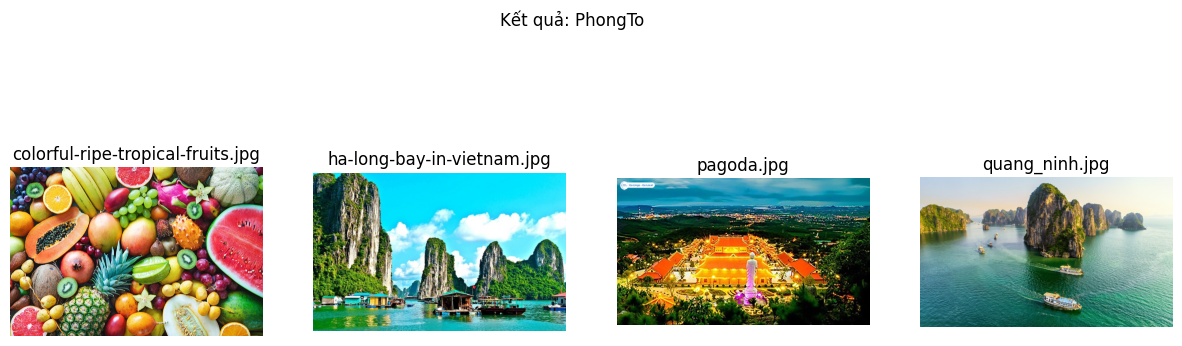

=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===
	T. Tịnh tiến 
	X. Xoay ảnh
	P. Phóng to ảnh
	H. Thu nhỏ ảnh
	C. Coordinate Mapping
	E. Thoát
Tạm biệt!


In [5]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
import os
from PIL import Image

# ====== HÀM BIẾN ĐỔI ẢNH ======
def tinhTien(im_np):
    if im_np.ndim == 2:
        return nd.shift(im_np, (100, 25), order=0)
    else:
        # Áp dụng tịnh tiến từng kênh màu
        return np.stack([nd.shift(im_np[:, :, i], (100, 25), order=0) for i in range(3)], axis=2)

def xoay(im_np):
    return nd.rotate(im_np, 20, reshape=False)

def phongTo(im_np):
    if im_np.ndim == 2:
        return nd.zoom(im_np, 2)
    else:
        return nd.zoom(im_np, (2, 2, 1))

def thuNho(im_np):
    if im_np.ndim == 2:
        return nd.zoom(im_np, 0.5)
    else:
        return nd.zoom(im_np, (0.5, 0.5, 1))

def coordinate_mapping(im_np):
    # Nếu là ảnh xám
    if im_np.ndim == 2:
        channels = [im_np]
    else:
        # Tách kênh nếu là ảnh màu
        channels = [im_np[:, :, i] for i in range(3)]

    V, H = channels[0].shape
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.ranf(M.shape) - d
    mp = (M + q).astype(int)

    mapped_channels = [nd.map_coordinates(ch, mp) for ch in channels]
    if len(mapped_channels) == 1:
        return mapped_channels[0].astype(np.uint8)
    else:
        return np.stack(mapped_channels, axis=2).astype(np.uint8)

# ====== ÁP DỤNG BIẾN ĐỔI VÀ HIỂN THỊ ======
def apply_transformation(transformation_func, method_name, force_gray=False):
    input_folder = "exercise"
    output_folder = "output_2"
    os.makedirs(output_folder, exist_ok=True)

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))][:4]
    processed_images = []

    for file_name in image_files:
        img_path = os.path.join(input_folder, file_name)
        img = Image.open(img_path)

        # Nếu muốn ảnh xám, chuyển sang mode 'L'
        if force_gray:
            img = img.convert("L")

        im_np = np.asarray(img)
        processed_np = transformation_func(im_np)

        if processed_np.ndim == 2:
            processed_img = Image.fromarray(processed_np.astype(np.uint8), mode='L')
        else:
            processed_img = Image.fromarray(processed_np.astype(np.uint8))

        output_path = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_{method_name}.png")
        processed_img.save(output_path)
        processed_images.append((processed_img, file_name))

    fig, axes = plt.subplots(1, len(processed_images), figsize=(15, 5))
    if len(processed_images) == 1:
        axes = [axes]
    for ax, (image, fname) in zip(axes, processed_images):
        ax.imshow(image)
        ax.set_title(fname)
        ax.axis('off')
    plt.suptitle(f"Kết quả: {method_name}")
    plt.show()


# ====== MENU CHƯƠNG TRÌNH ======
def menu():
    while True:
        print("=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===")
        print("\tT. Tịnh tiến ")
        print("\tX. Xoay ảnh")
        print("\tP. Phóng to ảnh")
        print("\tH. Thu nhỏ ảnh")
        print("\tC. Coordinate Mapping")
        print("\tE. Thoát")

        luachon = input("Nhập lựa chọn của bạn: ").upper()
        match luachon:
            case 'T':
                apply_transformation(tinhTien, "TinhTien", force_gray=True)
            case 'X':
                apply_transformation(xoay, "Xoay", force_gray=False)
            case 'P':
                apply_transformation(phongTo, "PhongTo", force_gray=False)
            case 'H':
                apply_transformation(thuNho, "ThuNho", force_gray=False)
            case 'C':
                apply_transformation(coordinate_mapping, "CoordinateMap", force_gray=True)
            case 'E':
                print("Tạm biệt!")
                break
            case _:
                print("Lựa chọn không hợp lệ!")
# ===== CHƯƠNG TRÌNH ======
menu()
